In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#reading the image
image = mpimg.imread('test.jpg')

In [119]:
#Grabbing the x and y values and making a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

In [120]:
print(str(xsize) + " " + str(ysize))

960 540


In [121]:
#Define color selection criteria
red_threshold = 200
green_threshold = 200
blue_threshold = 200

In [122]:
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [123]:
#identify the pixels below the threshold
threshold = (image[:,:,0] < rgb_threshold[0]) | (image[:,:,1] < rgb_threshold[1]) | (image[:,:,2] < rgb_threshold[2]) 

In [124]:
# Making all the pixels dark which are below the threshold value
color_select[threshold] = [0, 0, 0]

In [125]:
# co-ordinates for the three vertices of the triangle
left_bottom = [0, 540]
right_bottom = [960, 540]
apex = [450, 300]

In [126]:
# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
left_fit = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
right_fit = np.polyfit((apex[0], right_bottom[0]), (apex[1], right_bottom[1]), 1)
bottom_fit = np.polyfit((right_bottom[0], left_bottom[0]), (right_bottom[1], left_bottom[1]), 1)

In [127]:
# np.meshgrid gives a 2D array
# np.arange gives evenly distributed elements as per interval (default = 1)
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

In [128]:
region_thresholds = (YY > XX*left_fit[0] + left_fit[1]) & (YY > XX*right_fit[0] + right_fit[1]) & (YY < XX*bottom_fit[0] + bottom_fit[1])

In [130]:
line_image[~threshold & region_thresholds] = [255, 0, 0]

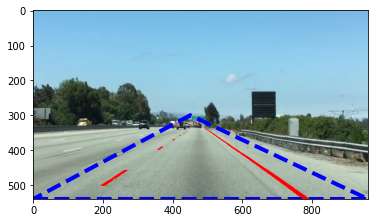

In [136]:
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.imshow(line_image)

In [133]:
mpimg.imsave("test-result.png", line_image)
mpimg.imsave("white-line-detection.png", color_select)